Dataset: The Contract Understanding Atticus Dataset (CUAD) can be downloaded from [The Atticus Project](https://www.atticusprojectai.org/cuad) by clicking CUADv1. Please use the .txt files for processing, as .pdf files may cause text extraction errors.

In [ ]:
# STEP 1: Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Adjust this path based on where you saved the copy
source_path = "/content/drive/My Drive/DataforDissertation/Contracts.txt"   # Your full folder
target_path = "/content/Contracts"

shutil.copytree(source_path, target_path)

print(f"All files copied to: {target_path}")

All files copied to: /content/Contracts


In [ ]:
import pandas as pd
import plotly.graph_objects as go

file_path = "/content/contracts_hybrid_predictions_true.xlsx"
df = pd.read_excel(file_path)

if 'category' not in df.columns:
    raise KeyError("Column 'category' not found in the dataset.")

counts = df['category'].dropna().value_counts()
total = counts.sum()
percentages = (counts / total) * 100

labels = counts.index.tolist()
values = counts.values.tolist()
perc_list = percentages.values.tolist()

text_labels = [f"{p:.1f}%" if p >= 2 else "" for p in perc_list]
text_positions = ["inside" if p >= 2 else "outside" for p in perc_list]

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            text=text_labels,
            textinfo="text",
            textposition=text_positions,
            hovertemplate="<b>%{label}</b><br>%{percent} (%{value})<extra></extra>",
            sort=True,
            direction="clockwise",
            showlegend=True,
        )
    ]
)

# layout: title centered, legend closer, margins reduced
fig.update_layout(
    title=dict(
        text="Category Distribution",
        x=0.5,
        y=0.95,
        xanchor="center",
        yanchor="top"
    ),
    margin=dict(l=20, r=20, t=100, b=20),
    legend=dict(
        orientation="v",
        x=0.7,  # Closer to the chart
        y=0.5,
        xanchor="left",
        yanchor="middle"
    )
)

fig.show()

In [ ]:
!pip install scikit-learn pandas openpyxl

**RULE-BASED KEYWORD CATEGORIZATION**

In [ ]:
import os
import pandas as pd

contracts_folder = '/content/Contracts'

category_keywords = {
    "IP": ["INTELLECTUAL PROPERTY AGREEMENT", "INTELLECTUAL PROPERTY RIGHTS AGREEMENT"],
    "COLLABORATION": ["COOPERATION AGREEMENT", "COLLABORATION AGREEMENT","Cooperation Agreement", "Collaborative Development and Commercialization Agreement", "Collaboration Agreement"],
    "AFFILIATE AGREEMENTS": ["AFFILIATE AGREEMENT", "Affiliate Program"],#"AFFILIATE"
    "AGENCY AGREEMENTS": ["AGENCY AGREEMENT", "Agency Agreement"],
    "CO-BRANDING": ["CO-BRANDING AGREEMENT","CO-BRANDING Agreement", "CO-BRANDING CONTENT", "CO-BRANDING"],
    "CONSULTING AGREEMENTS": ["CONSULTING AGREEMENT"],
    "DEVELOPMENT": ["DEVELOPMENT AGREEMENT", "Development Agreement", "DEVELOPMENT AND OPTION AGREEMENT"], #"DEVELOPMENT",
    "DISTRIBUTOR": ["DISTRIBUTOR AGREEMENT", "Distributor Agreement", "Distributorship agreement", "DISTRIBUTION AGREEMENT", "DISTRIBUTORSHIP AGREEMENT"],
    "ENDORSEMENT": ["ENDORSEMENT AGREEMENT", "Endorsement Agreement", "ENDORSEMENT"],
    "FRANCHISE": ["FRANCHISE AGREEMENT", "Franchisor", "Franchise Agreement"],
    "HOSTING": ["HOSTING AGREEMENT", "Hosting Agreement", "HOSTING", "ESCROW"],
    "JOINT VENTURE": ["JOINT VENTURE AGREEMENT", "JOINT FILING AGREEMENT", "JOINT FILING", "JOINT VENTURE"],
    "LICENSE AGREEMENTS": ["LICENSE AGREEMENT", "Content and License Agreement", "CONTENT LICENSE", "Content License Agreement", "LICENSING", "licensees"],
    "MAINTENANCE": ["Maintenance Agreement", "MAINTENANCE AGREEMENT"], #"Maintenance"]
    "MANUFACTURING": ["MANUFACTURING AGREEMENT", "MANUFACTURING", "Manufacturing Agreement"],
    "MARKETING": ["MARKETING AGREEMENT", "Marketing Agreement"],#"MARKETING",
    "NON-COMPETE NON-SOLICIT": ["NON-COMPETITION AND NON-SOLICITATION AGREEMENT", "NON-COMPETITION AGREEMENT", "NON COMPETITION AGREEMENT"],
    "OUTSOURCING": ["Outsourcing Agreement", "OUTSOURCING AGREEMENT", "Outsourcing Contract", "MANUFACTURING OUTSOURCING AGREEMENT"],
    "PROMOTION": ["PROMOTION AGREEMENT","Promotion Agreement"],
    "RESELLER": ["RESELLER AGREEMENT", "Reseller Agreement"],
    "SERVICE": ["SERVICES AGREEMENT", "SERVICING AGREEMENT", "SERVICE AGREEMENT", "Service Agreement", "Services Agreement"],
    "SPONSORSHIP": ["SPONSORSHIP AGREEMENT", "SPONSORSHIP", "Sponsorship Agreement"],
    "STRATEGIC ALLIANCE": ["STRATEGIC ALLIANCE AGREEMENT", "Strategic Alliance Agreement"],
    "SUPPLY": ["SUPPLY AGREEMENT", "Supply Agreement", "SUPPLY CONTRACT"],
    "TRANSPORTATION": ["Transportation Agreement", "TRANSPORTATION SERVICES AGREEMENT", "TRANSPORTATION", "TRANSPORTATION SERVICE AGREEMENT"]
}

# Prepare a list of (keyword, category) tuples, sorted by keyword length descending
keyword_cat_pairs = []
for category, keywords in category_keywords.items():
    for kw in keywords:
        keyword_cat_pairs.append((kw, category))
keyword_cat_pairs.sort(key=lambda x: len(x[0]), reverse=True)

def categorize_text_exact(text, keyword_cat_pairs, header_chars=1400):
    header = text[:header_chars].upper()  # Case-insensitive
    best_category = None
    best_idx = len(header) + 1
    for keyword, category in keyword_cat_pairs:
        idx = header.find(keyword.upper())
        if idx != -1 and idx < best_idx:
            best_idx = idx
            best_category = category
    return best_category if best_category else "Unknown"

data = []
for fname in os.listdir(contracts_folder):
    if fname.endswith('.txt'):
        file_path = os.path.join(contracts_folder, fname)
        with open(file_path, encoding='utf-8', errors='ignore') as f:
            text = f.read()
        cat = categorize_text_exact(text, keyword_cat_pairs)
        data.append({'file_name': fname, 'text': text, 'predicted category': cat})

df = pd.DataFrame(data)
#df = df[df['category'] != 'Unknown']

category2id = {cat: idx for idx, cat in enumerate(sorted(df['predicted category'].unique()))}
df['label'] = df['predicted category'].map(category2id)

df[['file_name','text', 'label','predicted category']].to_excel('/content/contracts_keywords_labeled_sorted.xlsx', index=False)

print("Label mapping:", category2id)
print(df.head())

Label mapping: {'AFFILIATE AGREEMENTS': 0, 'AGENCY AGREEMENTS': 1, 'CO-BRANDING': 2, 'COLLABORATION': 3, 'CONSULTING AGREEMENTS': 4, 'DEVELOPMENT': 5, 'DISTRIBUTOR': 6, 'ENDORSEMENT': 7, 'FRANCHISE': 8, 'HOSTING': 9, 'IP': 10, 'JOINT VENTURE': 11, 'LICENSE AGREEMENTS': 12, 'MAINTENANCE': 13, 'MANUFACTURING': 14, 'MARKETING': 15, 'NON-COMPETE NON-SOLICIT': 16, 'OUTSOURCING': 17, 'PROMOTION': 18, 'RESELLER': 19, 'SERVICE': 20, 'SPONSORSHIP': 21, 'STRATEGIC ALLIANCE': 22, 'SUPPLY': 23, 'TRANSPORTATION': 24, 'Unknown': 25}
                                           file_name  \
0  EmeraldHealthBioceuticalsInc_20200218_1-A_EX1A...   
1  MusclepharmCorp_20170208_10-KA_EX-10.38_989358...   
2  MFAFINANCIAL,INC_07_06_2020-EX-99.D-JOINT FILI...   
3  AURASYSTEMSINC_06_16_2010-EX-10.25-STRATEGIC A...   
4  CardlyticsInc_20180112_S-1_EX-10.16_11002987_E...   

                                                text  predicted category  \
0  Consulting and Product Development Agreement\n...         D

In [ ]:
import pandas as pd

# Load both files
df_pred = pd.read_excel('/content/contracts_keywords_labeled_sorted.xlsx')
df_true = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')

In [ ]:
print(df_pred.columns)
print(df_true.columns)

Index(['file_name', 'text', 'label', 'predicted category'], dtype='object')
Index(['file_name', 'text', 'category'], dtype='object')


In [ ]:
# Merge on 'file_name' (keep both text columns for now)
merged = pd.merge(
    df_true, df_pred,
    on='file_name',
    suffixes=('_true', '_pred'),
    how='inner'
)

# If text columns are identical, keep just one
merged['text'] = merged['text_true']  # or 'text_pred'
# If you want to check they’re identical:
# assert all(merged['text_true'] == merged['text_pred'])

# Build output DataFrame with exactly these columns:
final = merged[['file_name', 'text', 'category', 'predicted category']]

# Preview result
print(final.head())

final.to_excel('/content/merged_contracts_for_analysis.xlsx', index=False)

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text       category  \
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING   
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE   
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE   
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR   
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT   

  predicted category  
0        CO-BRANDING  
1            SERVICE  
2      JOINT VENTURE  
3        DISTRIBUTOR  
4        ENDORSEMENT  


In [ ]:
errors = merged[merged['category'] != merged['predicted category']]
print(f"Number of errors: {len(errors)}")

Number of errors: 15


Accuracy: 97.06%
                         precision    recall  f1-score   support

   AFFILIATE AGREEMENTS       1.00      0.80      0.89        10
      AGENCY AGREEMENTS       1.00      1.00      1.00        13
            CO-BRANDING       1.00      0.96      0.98        23
          COLLABORATION       0.96      1.00      0.98        26
  CONSULTING AGREEMENTS       1.00      1.00      1.00        11
            DEVELOPMENT       1.00      0.86      0.93        29
            DISTRIBUTOR       1.00      1.00      1.00        32
            ENDORSEMENT       0.96      1.00      0.98        24
              FRANCHISE       1.00      0.93      0.97        15
                HOSTING       1.00      0.90      0.95        20
                     IP       1.00      1.00      1.00        17
          JOINT VENTURE       1.00      0.96      0.98        24
     LICENSE AGREEMENTS       0.92      1.00      0.96        34
            MAINTENANCE       1.00      0.91      0.95        34
       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



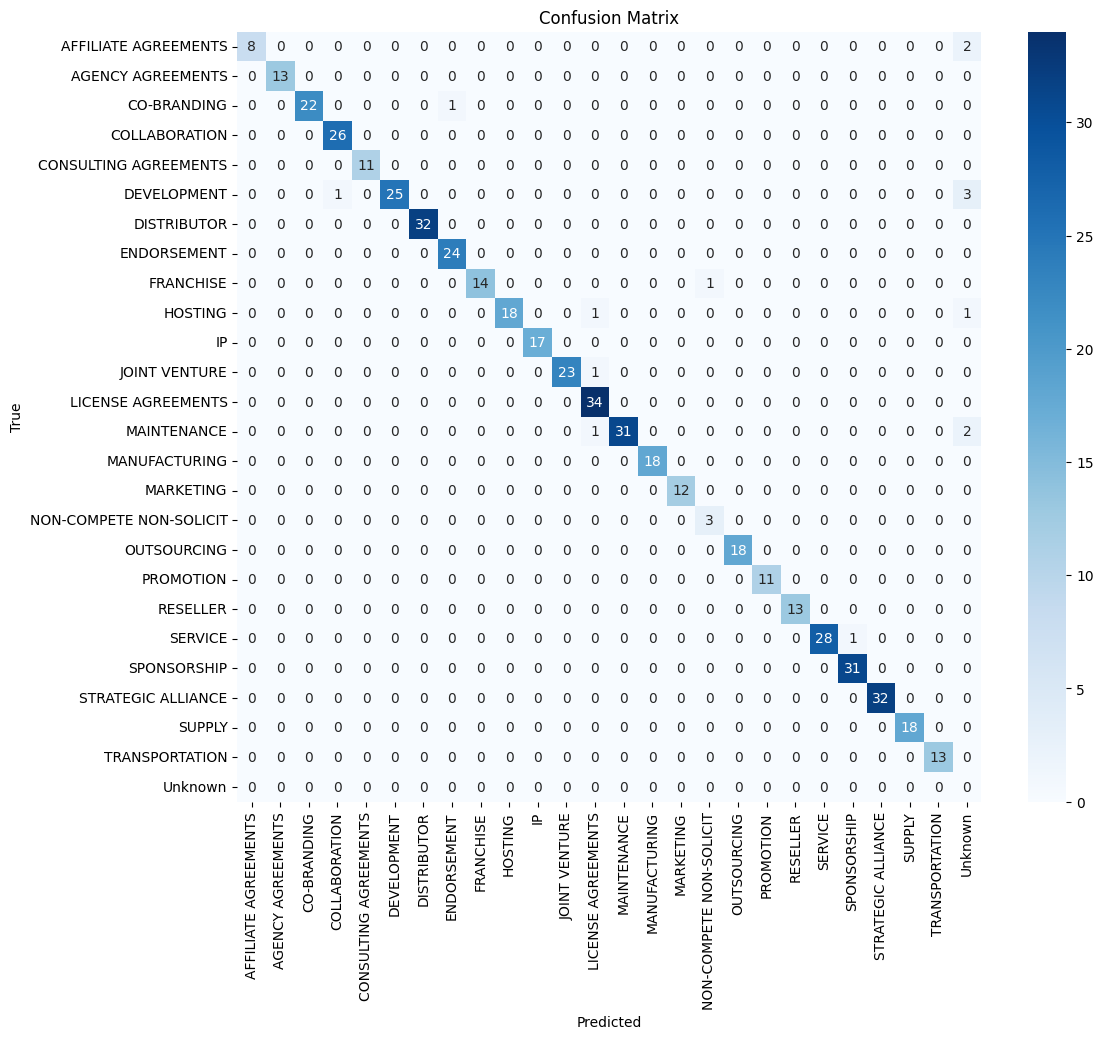

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust column names if yours are different
y_true = merged['category']
y_pred = merged['predicted category']

print("Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
print(classification_report(y_true, y_pred))

# Confusion matrix with all unique classes
labels = sorted(list(set(y_true) | set(y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 97.06%
Precision: 98.75%
Recall: 97.06%
F1 Score: 97.79%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



**TF-IDF+LR**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace with the actual path)
df = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')

# Vectorizer setup
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')

# Split the data into train and test (You can split as per your needs)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.25, stratify=df['category'], random_state=42)

# Vectorize train and test data
X_train_vec = vectorizer.fit_transform(train_df['text'])
X_test_vec = vectorizer.transform(test_df['text'])

y_train = train_df['category']
y_test = test_df['category']

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train_vec, y_train)

# Make predictions
y_pred = clf.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# # Confusion matrix
# labels = sorted(list(set(y_test) | set(y_pred)))  # Combine unique labels from both true and predicted values
# cm = confusion_matrix(y_test, y_pred, labels=labels)

# # Plot confusion matrix
# plt.figure(figsize=(12,10))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# If you want to save the predictions along with file_name and text in the output
results_df = pd.DataFrame({
    'file_name': test_df['file_name'],
    'text': test_df['text'],
    'true_category': test_df['category'],
    'predicted_category': y_pred
})

# Save to Excel
results_df.to_excel('/content/contracts_predictions_output.xlsx', index=False)
print("Saved predictions to /content/contracts_predictions_output.xlsx")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Accuracy: 58.59%

Classification Report:
                         precision    recall  f1-score   support

   AFFILIATE AGREEMENTS       0.00      0.00      0.00         2
      AGENCY AGREEMENTS       1.00      0.33      0.50         3
            CO-BRANDING       1.00      0.50      0.67         6
          COLLABORATION       0.75      0.86      0.80         7
  CONSULTING AGREEMENTS       1.00      1.00      1.00         3
            DEVELOPMENT       0.33      0.71      0.45         7
            DISTRIBUTOR       0.78      0.88      0.82         8
            ENDORSEMENT       1.00      0.50      0.67         6
              FRANCHISE       1.00      1.00      1.00         4
                HOSTING       0.75      0.60      0.67         5
                     IP       1.00      0.50      0.67         4
          JOINT VENTURE       0.83      0.83      0.83         6
     LICENSE AGREEMENTS       0.56      0.56      0.56         9
            MAINTENANCE       0.50      0.67    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Saved predictions to /content/contracts_predictions_output.xlsx


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='weighted')*100
recall = recall_score(y_test, y_pred, average='weighted')*100
f1 = f1_score(y_test, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 57.81%
Precision: 62.81%
Recall: 57.81%
F1 Score: 56.39%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**HYBRID**

In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# ---- Step 1: Prepare your keywords ----
category_keywords = {
    "IP": ["INTELLECTUAL PROPERTY AGREEMENT", "INTELLECTUAL PROPERTY RIGHTS AGREEMENT"],
    "COLLABORATION": ["COOPERATION AGREEMENT", "COLLABORATION AGREEMENT","Cooperation Agreement", "Collaboration Agreement"],
    "AFFILIATE AGREEMENTS": ["AFFILIATE AGREEMENT", "Affiliate Program", "AFFILIATION AGREEMENT", "AFFILIATE OFFICE AGREEMENT"],#"AFFILIATE"
    "AGENCY AGREEMENTS": ["AGENCY AGREEMENT", "Agency Agreement"],
    "CO-BRANDING": ["CO-BRANDING AGREEMENT","CO-BRANDING Agreement", "CO-BRANDING CONTENT", "CO-BRANDING"],
    "CONSULTING AGREEMENTS": ["CONSULTING AGREEMENT"],
    "DEVELOPMENT": ["DEVELOPMENT AGREEMENT", "Development Agreement", "DEVELOPMENT AND OPTION AGREEMENT", "DEVELOPMENT AND COMMERCIALIZATION AGREEMENT"], #"DEVELOPMENT",
    "DISTRIBUTOR": ["DISTRIBUTOR AGREEMENT", "Distributor Agreement", "Distributorship agreement", "DISTRIBUTION AGREEMENT", "DISTRIBUTORSHIP AGREEMENT"],
    "ENDORSEMENT": ["ENDORSEMENT AGREEMENT", "Endorsement Agreement", "ENDORSEMENT" ],
    "FRANCHISE": ["FRANCHISE AGREEMENT", "Franchisor", "Franchise Agreement"],
    "HOSTING": ["HOSTING AGREEMENT", "Hosting Agreement", "HOSTING", "ESCROW"],
    "JOINT VENTURE": ["JOINT VENTURE AGREEMENT", "JOINT FILING AGREEMENT", "JOINT FILING", "JOINT VENTURE"],
    "LICENSE AGREEMENTS": ["LICENSE AGREEMENT", "Content and License Agreement", "CONTENT LICENSE", "Content License Agreement", "licensees"], #"LICENSING",
    "MAINTENANCE": ["Maintenance Agreement", "MAINTENANCE AGREEMENT", "MAINTENANCE AND SUPPORT AGREEMENT"], #"Maintenance"]
    "MANUFACTURING": ["MANUFACTURING AGREEMENT", "MANUFACTURING", "Manufacturing Agreement"],
    "MARKETING": ["MARKETING AGREEMENT", "Marketing Agreement", "STRATEGIC LICENSING, DISTRIBUTION AND MARKETING AGREEMENT"],#"MARKETING",
    "NON-COMPETE NON-SOLICIT": ["NON-COMPETITION AND NON-SOLICITATION AGREEMENT", "NON-COMPETITION AGREEMENT", "NON COMPETITION AGREEMENT"],
    "OUTSOURCING": ["Outsourcing Agreement", "OUTSOURCING AGREEMENT", "Outsourcing Contract", "MANUFACTURING OUTSOURCING AGREEMENT"],
    "PROMOTION": ["PROMOTION AGREEMENT","Promotion Agreement"],
    "RESELLER": ["RESELLER AGREEMENT", "Reseller Agreement"],
    "SERVICE": ["SERVICES AGREEMENT", "SERVICING AGREEMENT", "SERVICE AGREEMENT", "Service Agreement", "Services Agreement"],
    "SPONSORSHIP": ["SPONSORSHIP AGREEMENT", "Sponsorship Agreement", "SPONSORSHIP AND DEVELOPMENT AGREEMENT"], #, "SPONSORSHIP"
    "STRATEGIC ALLIANCE": ["STRATEGIC ALLIANCE AGREEMENT", "Strategic Alliance Agreement"],
    "SUPPLY": ["SUPPLY AGREEMENT", "Supply Agreement", "SUPPLY CONTRACT"],
    "TRANSPORTATION": ["Transportation Agreement", "TRANSPORTATION SERVICES AGREEMENT", "TRANSPORTATION", "TRANSPORTATION SERVICE AGREEMENT"]
}

# Sort keywords in each category by length (descending)
for k in category_keywords:
    category_keywords[k] = sorted(category_keywords[k], key=len, reverse=True)

# ---- Step 2: Prepare your data ----
contracts_folder = "/content/Contracts"
data = []
for fname in os.listdir(contracts_folder):
    if fname.endswith('.txt'):
        with open(os.path.join(contracts_folder, fname), encoding='utf-8', errors='ignore') as f:
            text = f.read()
        data.append({'file_name': fname, 'text': text})
df = pd.DataFrame(data)

# ---- Step 3: Assign categories by keyword ----
def categorize_by_keyword(text, category_keywords, header_chars=2000):
    header = text[:header_chars]
    found = []
    for cat, keywords in category_keywords.items():
        for kw in keywords:
            idx = header.find(kw)
            if idx != -1:
                found.append((idx, len(kw), cat))
    # Sort first by position (idx), then by keyword length (desc)
    if found:
        found = sorted(found, key=lambda x: (x[0], -x[1]))
        return found[0][2]  # category of first keyword match
    return None

df['category_keyword'] = df['text'].apply(lambda x: categorize_by_keyword(x, category_keywords))

# ---- Step 4: Prepare ML Training Data ----
# Use only samples where a keyword confidently matched for training
train_df = df[df['category_keyword'].notnull()].copy()
category2id = {cat: idx for idx, cat in enumerate(sorted(train_df['category_keyword'].unique()))}
id2category = {idx: cat for cat, idx in category2id.items()}
train_df['label'] = train_df['category_keyword'].map(category2id)

# ---- Step 5: Train TF-IDF + LR Model ----
vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(train_df['text'])
y_train = train_df['label']

clf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train, y_train)

# ---- Step 6: Predict (Hybrid) ----
def hybrid_predict(text):
    cat = categorize_by_keyword(text, category_keywords)
    if cat:
        return cat
    # Fallback: ML model prediction
    X_vec = vectorizer.transform([text])
    pred_label = clf.predict(X_vec)[0]
    return id2category[pred_label]

df['predicted_category'] = df['text'].apply(hybrid_predict)

# ---- Step 7: Save Results ----
df[['file_name', 'text', 'predicted_category']].to_excel('/content/contracts_hybrid_predictions.xlsx', index=False)
print("Results saved to /content/contracts_hybrid_predictions.xlsx")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



Results saved to /content/contracts_hybrid_predictions.xlsx


In [ ]:
import pandas as pd

# Load both files
df_pred = pd.read_excel('/content/contracts_hybrid_predictions.xlsx')
df_true = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')

In [ ]:
print(df_pred.columns)
print(df_true.columns)

Index(['file_name', 'text', 'predicted_category'], dtype='object')
Index(['file_name', 'text', 'category'], dtype='object')


In [ ]:
# Merge on 'file_name' (keep both text columns for now)
merged = pd.merge(
    df_true, df_pred,
    on='file_name',
    suffixes=('_true', '_pred'),
    how='inner'
)

# If text columns are identical, keep just one
merged['text'] = merged['text_true']  # or 'text_pred'
# If you want to check they’re identical:
# assert all(merged['text_true'] == merged['text_pred'])

# Build output DataFrame with exactly these columns:
final = merged[['file_name', 'text', 'category', 'predicted_category']]

# Preview result
print(final.head())

final.to_excel('/content/merged_contracts_for_analysis.xlsx', index=False)

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text       category  \
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING   
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE   
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE   
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR   
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT   

  predicted_category  
0        CO-BRANDING  
1            SERVICE  
2      JOINT VENTURE  
3        DISTRIBUTOR  
4        ENDORSEMENT  


In [ ]:
errors = merged[merged['category'] != merged['predicted_category']]
print(errors[['file_name', 'category', 'predicted_category']])

                                             file_name            category  \
293  MusclepharmCorp_20170208_10-KA_EX-10.38_989358...         CO-BRANDING   
331  PACIRA PHARMACEUTICALS, INC. - A_R STRATEGIC L...  LICENSE AGREEMENTS   
347  PfHospitalityGroupInc_20150923_10-12G_EX-10.1_...           FRANCHISE   

          predicted_category  
293              ENDORSEMENT  
331                MARKETING  
347  NON-COMPETE NON-SOLICIT  


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust column names if yours are different
y_true = merged['category']
y_pred = merged['predicted_category']

print("Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))
print(classification_report(y_true, y_pred))

# # Confusion matrix with all unique classes
# labels = sorted(list(set(y_true) | set(y_pred)))
# cm = confusion_matrix(y_true, y_pred, labels=labels)

# plt.figure(figsize=(12,10))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=labels, yticklabels=labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

Accuracy: 99.41%
                         precision    recall  f1-score   support

   AFFILIATE AGREEMENTS       1.00      1.00      1.00        10
      AGENCY AGREEMENTS       1.00      1.00      1.00        13
            CO-BRANDING       1.00      0.96      0.98        23
          COLLABORATION       1.00      1.00      1.00        26
  CONSULTING AGREEMENTS       1.00      1.00      1.00        11
            DEVELOPMENT       1.00      1.00      1.00        29
            DISTRIBUTOR       1.00      1.00      1.00        32
            ENDORSEMENT       0.96      1.00      0.98        24
              FRANCHISE       1.00      0.93      0.97        15
                HOSTING       1.00      1.00      1.00        20
                     IP       1.00      1.00      1.00        17
          JOINT VENTURE       1.00      1.00      1.00        24
     LICENSE AGREEMENTS       1.00      0.97      0.99        34
            MAINTENANCE       1.00      1.00      1.00        34
       

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 99.41%
Precision: 99.48%
Recall: 99.41%
F1 Score: 99.42%


**LEGALBERT**

In [ ]:
!pip install transformers datasets

In [ ]:
import pandas as pd

df = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')  # ← Change to your filename
print(df.head())

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text       category  
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING  
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE  
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE  
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR  
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT  


In [ ]:
if df['category'].dtype == object:
    label2id = {l: i for i, l in enumerate(sorted(df['category'].unique()))}
    id2label = {i: l for l, i in label2id.items()}
    df['category'] = df['category'].map(label2id)
else:
    label2id = {str(i): i for i in sorted(df['category'].unique())}
    id2label = {i: str(i) for i in sorted(df['category'].unique())}

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)

In [ ]:
split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split['train']
eval_dataset = split['test']

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = 'nlpaueb/legal-bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
num_labels = len(label2id)

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=num_labels
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
    tokenized_inputs = tokenizer(
        examples['text'], truncation=True, padding='max_length', max_length=512
    )
    # Add the labels to the tokenized inputs
    tokenized_inputs['labels'] = examples['category']
    return tokenized_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
train_dataset.to_pandas().to_excel('/content/train_dataset.xlsx', index=False)
eval_dataset.to_pandas().to_excel('/content/eval_dataset.xlsx', index=False)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='/content/contract_classifier',
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

/tmp/ipython-input-1213185639.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,2.915378
2,No log,1.783255
3,No log,1.132027
4,No log,0.843882
5,1.827500,0.753184


TrainOutput(global_step=510, training_loss=1.8081071386150285, metrics={'train_runtime': 277.6677, 'train_samples_per_second': 7.347, 'train_steps_per_second': 1.837, 'total_flos': 536857395240960.0, 'train_loss': 1.8081071386150285, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(eval_dataset)
preds = predictions.predictions.argmax(axis=-1)

{'eval_loss': 0.75318443775177, 'eval_runtime': 2.9428, 'eval_samples_per_second': 34.661, 'eval_steps_per_second': 8.835, 'epoch': 5.0}


In [ ]:
import numpy as np

eval_df = pd.DataFrame({
    'text': eval_dataset['text'],
    'true_label': eval_dataset['category'],
    'pred_label': preds
})
eval_df['true_category'] = eval_df['true_label'].map(id2label)
eval_df['pred_category'] = eval_df['pred_label'].map(id2label)
eval_df.to_excel('/content/contract_predictions.xlsx', index=False)
print("Done! Results saved to /content/contract_predictions.xlsx")

Done! Results saved to /content/contract_predictions.xlsx


In [ ]:
import pandas as pd

results = pd.read_excel('/content/contract_predictions.xlsx')
print(results.head())

                                                text  true_label  pred_label  \
0  AMENDMENT NO. 3\n\nDated as of February 19, 20...          12          12   
1  Exhibit 10.12\n\nCERTAIN IDENTIFIED INFORMATIO...          14          14   
2  Exhibit 10.20\n\n(TRANSLATION) OUTSOURCING AGR...          17          17   
3  Execution version\n\n\n\n  Amendment n° 01   t...          13          13   
4  Exhibit 10.15\n\n  THE JOINT CORP.   FRANCHISE...           8           8   

        true_category       pred_category  
0  LICENSE AGREEMENTS  LICENSE AGREEMENTS  
1       MANUFACTURING       MANUFACTURING  
2         OUTSOURCING         OUTSOURCING  
3         MAINTENANCE         MAINTENANCE  
4           FRANCHISE           FRANCHISE  


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your results DataFrame (with 'true_label' and 'pred_label')
df = pd.read_excel('/content/contract_predictions.xlsx')  # or .csv

# 1. Accuracy
acc = accuracy_score(df['true_label'], df['pred_label'])
print("Accuracy: {:.2f}%".format(acc * 100))

# 2. Classification report (precision, recall, f1 for each category)
print("\nClassification Report:")
print(classification_report(df['true_label'], df['pred_label']))

# # Confusion matrix for visual analysis
# y_true = df['true_label']
# y_pred = df['pred_label']
# cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))
# plt.figure(figsize=(12, 10))
# sns.heatmap(cm, annot=True, fmt='d',
#             xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Accuracy: 98.04%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         6
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         1
           5       0.80      1.00      0.89         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         2
          12       1.00      0.89      0.94         9
          13       1.00      1.00      1.00        15
          14       0.80      1.00      0.89         4
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = df['true_label']
y_pred = df['pred_label']

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 98.04%
Precision: 98.43%
Recall: 98.04%
F1 Score: 98.09%


**DISTILBERT**

In [ ]:
!pip install transformers datasets

In [ ]:
import pandas as pd

df = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')  # ← Change to your filename
print(df.head())

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text       category  
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING  
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE  
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE  
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR  
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT  


In [ ]:
if df['category'].dtype == object:
    label2id = {l: i for i, l in enumerate(sorted(df['category'].unique()))}
    id2label = {i: l for l, i in label2id.items()}
    df['category'] = df['category'].map(label2id)
else:
    label2id = {str(i): i for i in sorted(df['category'].unique())}
    id2label = {i: str(i) for i in sorted(df['category'].unique())}

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)

In [ ]:
split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split['train']
eval_dataset = split['test']

In [ ]:
train_dataset.to_pandas().to_excel('/content/train_dataset.xlsx', index=False)
eval_dataset.to_pandas().to_excel('/content/eval_dataset.xlsx', index=False)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
num_labels = len(label2id)

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=num_labels, id2label=id2label, label2id=label2id
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
    tokenized_inputs = tokenizer(
        examples['text'], truncation=True, padding='max_length', max_length=512
    )
    # Add the labels to the tokenized inputs
    tokenized_inputs['labels'] = examples['category']
    return tokenized_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='/content/contract_classifier_distilbert',
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

/tmp/ipython-input-1516595078.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,2.968102
2,No log,2.064537
3,No log,1.441918
4,No log,1.124760
5,1.994800,1.027552


TrainOutput(global_step=510, training_loss=1.9771846472048291, metrics={'train_runtime': 270.37, 'train_samples_per_second': 7.545, 'train_steps_per_second': 1.886, 'total_flos': 270344335564800.0, 'train_loss': 1.9771846472048291, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(eval_dataset)
preds = predictions.predictions.argmax(axis=-1)

{'eval_loss': 1.0275524854660034, 'eval_runtime': 1.5403, 'eval_samples_per_second': 66.221, 'eval_steps_per_second': 16.88, 'epoch': 5.0}


In [ ]:
import numpy as np

eval_df = pd.DataFrame({
    'text': eval_dataset['text'],
    'true_label': eval_dataset['category'],
    'pred_label': preds
})
eval_df['true_category'] = eval_df['true_label'].map(id2label)
eval_df['pred_category'] = eval_df['pred_label'].map(id2label)
eval_df.to_excel('/content/contract_predictions_distilbert.xlsx', index=False)
print("Done! Results saved to /content/contract_predictions_distilbert.xlsx")

Done! Results saved to /content/contract_predictions_distilbert.xlsx


In [ ]:
import pandas as pd

results = pd.read_excel('/content/contract_predictions_distilbert.xlsx')
print(results.head())

                                                text  true_label  pred_label  \
0  AMENDMENT NO. 3\n\nDated as of February 19, 20...          12          12   
1  Exhibit 10.12\n\nCERTAIN IDENTIFIED INFORMATIO...          14          14   
2  Exhibit 10.20\n\n(TRANSLATION) OUTSOURCING AGR...          17          17   
3  Execution version\n\n\n\n  Amendment n° 01   t...          13          13   
4  Exhibit 10.15\n\n  THE JOINT CORP.   FRANCHISE...           8           8   

        true_category       pred_category  
0  LICENSE AGREEMENTS  LICENSE AGREEMENTS  
1       MANUFACTURING       MANUFACTURING  
2         OUTSOURCING         OUTSOURCING  
3         MAINTENANCE         MAINTENANCE  
4           FRANCHISE           FRANCHISE  


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load your results DataFrame (with 'true_label' and 'pred_label')
df = pd.read_excel('/content/contract_predictions_distilbert.xlsx')  # or .csv

# 1. Accuracy
acc = accuracy_score(df['true_label'], df['pred_label'])
print("Accuracy: {:.2f}%".format(acc * 100))

# 2. Classification report (precision, recall, f1 for each category)
print("\nClassification Report:")
print(classification_report(df['true_label'], df['pred_label']))

# # Confusion matrix for visual analysis
# y_true = df['true_label']
# y_pred = df['pred_label']
# cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))
# plt.figure(figsize=(12, 10))
# sns.heatmap(cm, annot=True, fmt='d',
#             xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Accuracy: 97.06%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           6       0.80      1.00      0.89         4
           7       0.86      1.00      0.92         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         2
          12       0.89      0.89      0.89         9
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = df['true_label']
y_pred = df['pred_label']

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*10

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 97.06%
Precision: 97.39%
Recall: 97.06%
F1 Score: 9.71%


**ROBERTA**

In [ ]:
!pip install transformers datasets

In [ ]:
import pandas as pd

df = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')
print(df.head())

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text       category  
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING  
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE  
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE  
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR  
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT  


In [ ]:
if df['category'].dtype == object:
    label2id = {l: i for i, l in enumerate(sorted(df['category'].unique()))}
    id2label = {i: l for l, i in label2id.items()}
    df['category'] = df['category'].map(label2id)
else:
    label2id = {str(i): i for i in sorted(df['category'].unique())}
    id2label = {i: str(i) for i in sorted(df['category'].unique())}

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)

In [ ]:
split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split['train']
eval_dataset = split['test']

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
num_labels = len(label2id)

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=num_labels
)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
    tokenized_inputs = tokenizer(
        examples['text'], truncation=True, padding='max_length', max_length=512
    )
    # Add the labels to the tokenized inputs
    tokenized_inputs['labels'] = examples['category']
    return tokenized_inputs

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='/content/contract_classifier_distilbert',
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

/tmp/ipython-input-544608591.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,3.063209
2,No log,3.090023
3,No log,2.461849
4,No log,1.629154
5,2.414700,0.973432
6,2.414700,0.566445
7,2.414700,0.378816
8,2.414700,0.291635
9,2.414700,0.253313
10,0.389500,0.242981


TrainOutput(global_step=1020, training_loss=1.3788223654616112, metrics={'train_runtime': 872.4151, 'train_samples_per_second': 4.677, 'train_steps_per_second': 1.169, 'total_flos': 1073714790481920.0, 'train_loss': 1.3788223654616112, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(eval_dataset)
preds = predictions.predictions.argmax(axis=-1)

{'eval_loss': 0.24298083782196045, 'eval_runtime': 2.9018, 'eval_samples_per_second': 35.15, 'eval_steps_per_second': 8.96, 'epoch': 10.0}


In [ ]:
import numpy as np

eval_df = pd.DataFrame({
    'text': eval_dataset['text'],
    'true_label': eval_dataset['category'],
    'pred_label': preds
})
eval_df['true_category'] = eval_df['true_label'].map(id2label)
eval_df['pred_category'] = eval_df['pred_label'].map(id2label)
eval_df.to_excel('/content/contract_predictions_roberta.xlsx', index=False)
print("Done! Results saved to /content/contract_predictions_roberta.xlsx")

Done! Results saved to /content/contract_predictions_roberta.xlsx


In [ ]:
import pandas as pd

results = pd.read_excel('/content/contract_predictions_roberta.xlsx')
print(results.head())

                                                text  true_label  pred_label  \
0  AMENDMENT NO. 3\n\nDated as of February 19, 20...          12          12   
1  Exhibit 10.12\n\nCERTAIN IDENTIFIED INFORMATIO...          14          14   
2  Exhibit 10.20\n\n(TRANSLATION) OUTSOURCING AGR...          17          17   
3  Execution version\n\n\n\n  Amendment n° 01   t...          13          13   
4  Exhibit 10.15\n\n  THE JOINT CORP.   FRANCHISE...           8           8   

        true_category       pred_category  
0  LICENSE AGREEMENTS  LICENSE AGREEMENTS  
1       MANUFACTURING       MANUFACTURING  
2         OUTSOURCING         OUTSOURCING  
3         MAINTENANCE         MAINTENANCE  
4           FRANCHISE           FRANCHISE  


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load your results DataFrame (with 'true_label' and 'pred_label')
df = pd.read_excel('/content/contract_predictions_roberta.xlsx')  # or .csv

# 1. Accuracy
acc = accuracy_score(df['true_label'], df['pred_label'])
print("Accuracy: {:.2f}%".format(acc * 100))

# 2. Classification report (precision, recall, f1 for each category)
print("\nClassification Report:")
print(classification_report(df['true_label'], df['pred_label']))

# # Confusion matrix for visual analysis
# y_true = df['true_label']
# y_pred = df['pred_label']
# cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))
# plt.figure(figsize=(12, 10))
# sns.heatmap(cm, annot=True, fmt='d',
#             xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

Accuracy: 97.06%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       0.83      1.00      0.91         5
          11       1.00      1.00      1.00         2
          12       1.00      0.89      0.94         9
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         1
          17       1.00      1.00      1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = df['true_label']
y_pred = df['pred_label']

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 97.06%
Precision: 98.69%
Recall: 97.06%
F1 Score: 97.64%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**XLNET**

In [ ]:
!pip install transformers datasets

In [ ]:
import pandas as pd

df = pd.read_excel('/content/contracts_hybrid_predictions_true.xlsx')
df.rename(columns={'category': 'label'}, inplace=True)
print(df.head())

                                           file_name  \
0  2ThemartComInc_19990826_10-12G_EX-10.10_670028...   
1  ABILITYINC_06_15_2020-EX-4.25-SERVICES AGREEME...   
2  ACCELERATEDTECHNOLOGIESHOLDINGCORP_04_24_2003-...   
3  ACCURAYINC_09_01_2010-EX-10.31-DISTRIBUTOR AGR...   
4  ADAMSGOLFINC_03_21_2005-EX-10.17-ENDORSEMENT A...   

                                                text          label  
0  CO-BRANDING AND ADVERTISING AGREEMENT\n\nTHIS ...    CO-BRANDING  
1  EXHIBIT 4.25 INFORMATION IN THIS EXHIBIT IDENT...        SERVICE  
2  EXHIBIT 10.13\n\n                             ...  JOINT VENTURE  
3  Exhibit 10.31    PURSUANT TO 17 C.F.R. § 240.2...    DISTRIBUTOR  
4  REDACTED COPY\n\nCONFIDENTIAL TREATMENT REQUES...    ENDORSEMENT  


In [ ]:
# --- 1) Your category_keywords dict (as given) ---
category_keywords = {
    "IP": ["INTELLECTUAL PROPERTY AGREEMENT", "INTELLECTUAL PROPERTY RIGHTS AGREEMENT"],
    "COLLABORATION": ["COOPERATION AGREEMENT", "COLLABORATION AGREEMENT","Cooperation Agreement", "Collaboration Agreement"],
    "AFFILIATE AGREEMENTS": ["AFFILIATE AGREEMENT", "Affiliate Program", "AFFILIATION AGREEMENT", "AFFILIATE OFFICE AGREEMENT"],
    "AGENCY AGREEMENTS": ["AGENCY AGREEMENT", "Agency Agreement"],
    "CO-BRANDING": ["CO-BRANDING AGREEMENT","CO-BRANDING Agreement", "CO-BRANDING CONTENT", "CO-BRANDING"],
    "CONSULTING AGREEMENTS": ["CONSULTING AGREEMENT"],
    "DEVELOPMENT": ["DEVELOPMENT AGREEMENT", "Development Agreement", "DEVELOPMENT AND OPTION AGREEMENT", "DEVELOPMENT AND COMMERCIALIZATION AGREEMENT"],
    "DISTRIBUTOR": ["DISTRIBUTOR AGREEMENT", "Distributor Agreement", "Distributorship agreement", "DISTRIBUTION AGREEMENT", "DISTRIBUTORSHIP AGREEMENT"],
    "ENDORSEMENT": ["ENDORSEMENT AGREEMENT", "Endorsement Agreement", "ENDORSEMENT" ],
    "FRANCHISE": ["FRANCHISE AGREEMENT", "Franchisor", "Franchise Agreement"],
    "HOSTING": ["HOSTING AGREEMENT", "Hosting Agreement", "HOSTING", "ESCROW"],
    "JOINT VENTURE": ["JOINT VENTURE AGREEMENT", "JOINT FILING AGREEMENT", "JOINT FILING", "JOINT VENTURE"],
    "LICENSE AGREEMENTS": ["LICENSE AGREEMENT", "Content and License Agreement", "CONTENT LICENSE", "Content License Agreement", "licensees"],
    "MAINTENANCE": ["Maintenance Agreement", "MAINTENANCE AGREEMENT", "MAINTENANCE AND SUPPORT AGREEMENT"],
    "MANUFACTURING": ["MANUFACTURING AGREEMENT", "MANUFACTURING", "Manufacturing Agreement"],
    "MARKETING": ["MARKETING AGREEMENT", "Marketing Agreement", "STRATEGIC LICENSING, DISTRIBUTION AND MARKETING AGREEMENT"],
    "NON-COMPETE NON-SOLICIT": ["NON-COMPETITION AND NON-SOLICITATION AGREEMENT", "NON-COMPETITION AGREEMENT", "NON COMPETITION AGREEMENT"],
    "OUTSOURCING": ["Outsourcing Agreement", "OUTSOURCING AGREEMENT", "Outsourcing Contract", "MANUFACTURING OUTSOURCING AGREEMENT"],
    "PROMOTION": ["PROMOTION AGREEMENT","Promotion Agreement"],
    "RESELLER": ["RESELLER AGREEMENT", "Reseller Agreement"],
    "SERVICE": ["SERVICES AGREEMENT", "SERVICING AGREEMENT", "SERVICE AGREEMENT", "Service Agreement", "Services Agreement"],
    "SPONSORSHIP": ["SPONSORSHIP AGREEMENT", "Sponsorship Agreement", "SPONSORSHIP AND DEVELOPMENT AGREEMENT"],
    "STRATEGIC ALLIANCE": ["STRATEGIC ALLIANCE AGREEMENT", "Strategic Alliance Agreement"],
    "SUPPLY": ["SUPPLY AGREEMENT", "Supply Agreement", "SUPPLY CONTRACT"],
    "TRANSPORTATION": ["Transportation Agreement", "TRANSPORTATION SERVICES AGREEMENT", "TRANSPORTATION", "TRANSPORTATION SERVICE AGREEMENT"]
}

# --- 2) Choose mapping order ---
use_alphabetical = True  # set False to preserve dict insertion order
categories = sorted(category_keywords.keys()) if use_alphabetical else list(category_keywords.keys())

# --- 3) Build mappings ---
label2id = {cat: i for i, cat in enumerate(categories)}
id2label = {i: cat for cat, i in label2id.items()}

print("label2id:", label2id)
print("id2label:", id2label)

label2id: {'AFFILIATE AGREEMENTS': 0, 'AGENCY AGREEMENTS': 1, 'CO-BRANDING': 2, 'COLLABORATION': 3, 'CONSULTING AGREEMENTS': 4, 'DEVELOPMENT': 5, 'DISTRIBUTOR': 6, 'ENDORSEMENT': 7, 'FRANCHISE': 8, 'HOSTING': 9, 'IP': 10, 'JOINT VENTURE': 11, 'LICENSE AGREEMENTS': 12, 'MAINTENANCE': 13, 'MANUFACTURING': 14, 'MARKETING': 15, 'NON-COMPETE NON-SOLICIT': 16, 'OUTSOURCING': 17, 'PROMOTION': 18, 'RESELLER': 19, 'SERVICE': 20, 'SPONSORSHIP': 21, 'STRATEGIC ALLIANCE': 22, 'SUPPLY': 23, 'TRANSPORTATION': 24}
id2label: {0: 'AFFILIATE AGREEMENTS', 1: 'AGENCY AGREEMENTS', 2: 'CO-BRANDING', 3: 'COLLABORATION', 4: 'CONSULTING AGREEMENTS', 5: 'DEVELOPMENT', 6: 'DISTRIBUTOR', 7: 'ENDORSEMENT', 8: 'FRANCHISE', 9: 'HOSTING', 10: 'IP', 11: 'JOINT VENTURE', 12: 'LICENSE AGREEMENTS', 13: 'MAINTENANCE', 14: 'MANUFACTURING', 15: 'MARKETING', 16: 'NON-COMPETE NON-SOLICIT', 17: 'OUTSOURCING', 18: 'PROMOTION', 19: 'RESELLER', 20: 'SERVICE', 21: 'SPONSORSHIP', 22: 'STRATEGIC ALLIANCE', 23: 'SUPPLY', 24: 'TRANSPO

In [ ]:
if df['label'].dtype == object:
    label2id = {l: i for i, l in enumerate(sorted(df['label'].unique()))}
    id2label = {i: l for l, i in label2id.items()}
    df['label'] = df['label'].map(label2id)
else:
    label2id = {str(i): i for i in sorted(df['label'].unique())}
    id2label = {i: str(i) for i in sorted(df['label'].unique())}

In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df)

split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = split['train']
eval_dataset = split['test']

In [ ]:
train_dataset.to_pandas().to_excel('/content/train_dataset.xlsx', index=False)
eval_dataset.to_pandas().to_excel('/content/eval_dataset.xlsx', index=False)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_checkpoint = 'xlnet-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
num_labels = len(label2id)

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint, num_labels=num_labels
)

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(examples):
    return tokenizer(
        examples['text'], truncation=True, padding='max_length', max_length=512
    )

train_dataset = train_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/102 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='/content/results_xlnet',
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    learning_rate=2e-5,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
)

/tmp/ipython-input-3344653171.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,3.097070
2,No log,2.637930
3,No log,1.891529
4,No log,1.442196
5,2.116500,1.114672
6,2.116500,0.878861
7,2.116500,0.694217
8,2.116500,0.675128
9,2.116500,0.631482
10,0.290300,0.629688


TrainOutput(global_step=1020, training_loss=1.1832484020906335, metrics={'train_runtime': 848.429, 'train_samples_per_second': 4.809, 'train_steps_per_second': 1.202, 'total_flos': 1162533225185280.0, 'train_loss': 1.1832484020906335, 'epoch': 10.0})

In [ ]:
metrics = trainer.evaluate()
print(metrics)

predictions = trainer.predict(eval_dataset)
preds = predictions.predictions.argmax(axis=-1)

{'eval_loss': 0.6296880841255188, 'eval_runtime': 5.5687, 'eval_samples_per_second': 18.317, 'eval_steps_per_second': 4.669, 'epoch': 10.0}


In [ ]:
import numpy as np

eval_df = pd.DataFrame({
    'text': eval_dataset['text'],
    'true_label': eval_dataset['label'],
    'pred_label': preds
})
eval_df['true_category'] = eval_df['true_label'].map(id2label)
eval_df['pred_category'] = eval_df['pred_label'].map(id2label)
eval_df.to_excel('/content/contract_predictions_xlnet.xlsx', index=False)
print("Done! Results saved to /content/contract_predictions_xlnet.xlsx")

Done! Results saved to /content/contract_predictions_xlnet.xlsx


Accuracy: 82.35%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         6
           3       0.80      0.44      0.57         9
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         4
           6       1.00      1.00      1.00         4
           7       0.80      0.67      0.73         6
           8       0.75      0.75      0.75         4
           9       0.80      1.00      0.89         4
          10       1.00      0.60      0.75         5
          11       0.67      1.00      0.80         2
          12       0.88      0.78      0.82         9
          13       0.92      0.80      0.86        15
          14       1.00      1.00      1.00         4
          15       0.00      0.00      0.00         1
          17       0.67      1.00      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


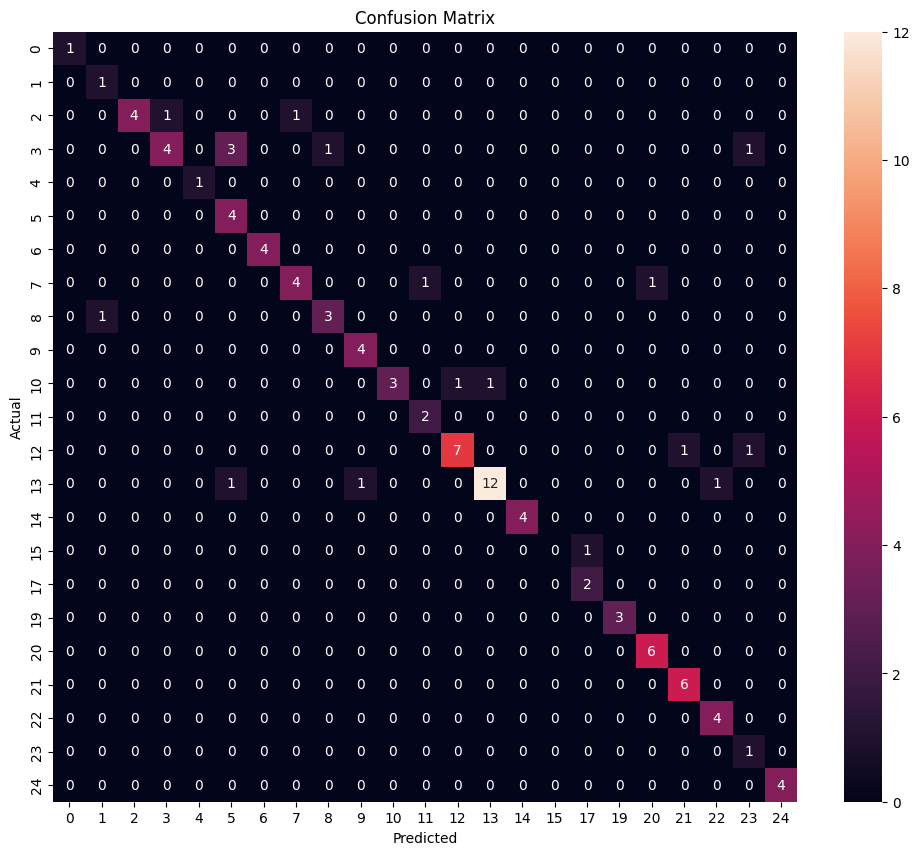

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your results DataFrame (with 'true_label' and 'pred_label')
df = pd.read_excel('/content/contract_predictions_xlnet.xlsx')  # or .csv

# 1. Accuracy
acc = accuracy_score(df['true_label'], df['pred_label'])
print("Accuracy: {:.2f}%".format(acc * 100))

# 2. Classification report (precision, recall, f1 for each category)
print("\nClassification Report:")
print(classification_report(df['true_label'], df['pred_label']))

# Confusion matrix for visual analysis
y_true = df['true_label']
y_pred = df['pred_label']
cm = confusion_matrix(y_true, y_pred, labels=sorted(y_true.unique()))
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_true = your list/array of true category labels
# y_pred = your list/array of predicted category labels

accuracy = accuracy_score(y_true, y_pred)*100
precision = precision_score(y_true, y_pred, average='weighted')*100
recall = recall_score(y_true, y_pred, average='weighted')*100
f1 = f1_score(y_true, y_pred, average='weighted')*100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 82.35%
Precision: 85.20%
Recall: 82.35%
F1 Score: 81.91%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import os
import pandas as pd
from sklearn.metrics import f1_score
import plotly.express as px

# -------------------- FILE PATHS --------------------
FILES = {
    "Rule-based": "/content/contracts_keywords_labeled_sorted.xlsx",
    "TF-IDF+LR": "/content/contracts_predictions_output.xlsx",
    "LegalBERT": "/content/contract_predictions.xlsx",
    "RoBERTa": "/content/contract_predictions_roberta.xlsx",
    "XLNet": "/content/contract_predictions_xlnet.xlsx",
    "HYBRID": "/content/contracts_hybrid_predictions.xlsx",
    "DistilBERT": "/content/contract_predictions_distilbert.xlsx"
}
PATH_TRUE = "/content/contracts_hybrid_predictions_true.xlsx"

# -------------------- SETTINGS --------------------
# F1 average mode: "macro" (default), "weighted", or "micro"
F1_AVG = "macro"

# -------------------- LOAD --------------------
def load_df(path: str) -> pd.DataFrame:
    ext = os.path.splitext(path)[1].lower()
    if ext in (".xlsx", ".xls"):
        return pd.read_excel(path)
    return pd.read_csv(path)

df_true = load_df(PATH_TRUE)[["text", "category"]]

# -------------------- F1 by model --------------------
f1_scores = {}
pred_candidates = ["pred_category", "predicted_category", "predicted category"]

for model_name, path in FILES.items():
    if not os.path.exists(path):
        print(f"[Info] File not found: {path}, skipping {model_name}")
        continue

    df_pred = load_df(path)
    print(f"\n[Debug] {model_name} columns: {list(df_pred.columns)}")

    pred_col = next((c for c in pred_candidates if c in df_pred.columns), None)
    if pred_col is None:
        print(f"[Warning] No predicted column found in {model_name}, skipping.")
        continue

    merged = pd.merge(df_true, df_pred[["text", pred_col]], on="text", how="inner")
    y_true = merged["category"].astype(str)
    y_pred = merged[pred_col].astype(str)

    # F1 score (multiclass-safe)
    f1 = f1_score(y_true, y_pred, average=F1_AVG) * 100.0
    f1_scores[model_name] = f1

if not f1_scores:
    raise RuntimeError("No F1 scores computed. Check file paths/columns above.")

# -------------------- Plot with Plotly --------------------
scores_df = pd.DataFrame({
    "Model": list(f1_scores.keys()),
    "F1-Score": [f1_scores[m] for m in f1_scores.keys()]
})

color_sequence = ["lightblue", "lightgoldenrodyellow", "violet", "orange", "red", "pink", "deepskyblue"]

# ---- Sort by F1 Score before plotting ----
scores_df = scores_df.sort_values("F1-Score", ascending=True)  # lowest → highest

fig = px.bar(
    scores_df,
    x="Model",
    y="F1-Score",
    color="Model",
    color_discrete_sequence=color_sequence[:len(scores_df)],
    text=scores_df["F1-Score"].map(lambda v: f"{v:.1f}%"),
    title=f"Overall F1-Score Comparison Across Models ({F1_AVG.title()})"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{x}</b><br>F1-Score: %{y:.2f}%<extra></extra>"
)

# Adjust distance/width via bargap (smaller = thicker bars, less distance)
fig.update_layout(
    title_x=0.08,
    yaxis=dict(title="F1-Score (%)", range=[0, 110]),
    xaxis_title="Model",
    showlegend=False,
    title_font=dict(size=22),  # title font size
    font=dict(size=16),
    margin=dict(l=40, r=1300, t=60, b=40),
    bargap=0.4  # tweak 0.05 (thick) … 0.6 (thin)
)

fig.show()


[Debug] Rule-based columns: ['file_name', 'text', 'label', 'predicted category']

[Debug] TF-IDF+LR columns: ['file_name', 'text', 'true_category', 'predicted_category']

[Debug] LegalBERT columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']

[Debug] RoBERTa columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']

[Debug] XLNet columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']

[Debug] HYBRID columns: ['file_name', 'text', 'predicted_category']

[Debug] DistilBERT columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']


In [ ]:
import os
import pandas as pd
from sklearn.metrics import accuracy_score
import plotly.express as px

# -------------------- FILE PATHS --------------------
FILES = {
    "Rule-based": "/content/contracts_keywords_labeled_sorted.xlsx",
    "TF-IDF+LR": "/content/contracts_predictions_output.xlsx",
    "LegalBERT": "/content/contract_predictions.xlsx",
    "RoBERTa": "/content/contract_predictions_roberta.xlsx",
    "XLNet": "/content/contract_predictions_xlnet.xlsx",
    "HYBRID": "/content/contracts_hybrid_predictions.xlsx",
    "DistilBERT": "/content/contract_predictions_distilbert.xlsx"
}

PATH_TRUE = "/content/contracts_hybrid_predictions_true.xlsx"

# ---- Load data ----
def load_df(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in (".xlsx", ".xls"):
        return pd.read_excel(path)
    return pd.read_csv(path)

df_true = load_df(PATH_TRUE)[["text", "category"]]

# ---- Accuracy Calculation ----
accuracies = {}
pred_candidates = ["pred_category", "predicted_category", "predicted category"]

for model_name, path in FILES.items():
    if not os.path.exists(path):
        print(f"[Info] File not found: {path}, skipping {model_name}")
        continue

    df_pred = load_df(path)
    print(f"\n[Debug] {model_name} columns: {list(df_pred.columns)}")

    pred_col = next((c for c in pred_candidates if c in df_pred.columns), None)
    if pred_col is None:
        print(f"[Warning] No predicted column found in {model_name}, skipping.")
        continue

    merged = pd.merge(df_true, df_pred[["text", pred_col]], on="text", how="inner")
    y_true = merged["category"].astype(str)
    y_pred = merged[pred_col].astype(str)

    acc = accuracy_score(y_true, y_pred) * 100
    accuracies[model_name] = acc

# ---- Plot with Plotly ----
if not accuracies:
    raise RuntimeError("No accuracies computed. Check file paths/columns above.")

acc_df = pd.DataFrame({
    "Model": list(accuracies.keys()),
    "Accuracy": [accuracies[m] for m in accuracies.keys()]
})

# custom colors to mirror your Matplotlib palette
color_sequence = ["skyblue", "salmon", "lightgreen", "orange", "plum", "gold", "darkturquoise"]

# ---- Sort by Accuracy before plotting ----
acc_df = acc_df.sort_values("Accuracy", ascending=True)  # lowest → highest

fig = px.bar(
    acc_df,
    x="Model",
    y="Accuracy",
    color="Model",
    color_discrete_sequence=color_sequence[:len(acc_df)],
    text=acc_df["Accuracy"].map(lambda v: f"{v:.1f}%"),
    title="Overall Accuracy Comparison Across Models"
)

fig.update_traces(
    textposition="outside",
    hovertemplate="<b>%{x}</b><br>Accuracy: %{y:.2f}%<extra></extra>"
)

fig.update_layout(
    title_x=0.10,
    yaxis=dict(title="Accuracy (%)", range=[0, 110]),
    xaxis_title="Model",
    showlegend=False,
    title_font=dict(size=22),  # title font size
    font=dict(size=16),
    margin=dict(l=40, r=1300, t=60, b=40),
    bargap=0.4  # tweak 0.05 (thick) … 0.6 (thin)
)

fig.show()


[Debug] Rule-based columns: ['file_name', 'text', 'label', 'predicted category']

[Debug] TF-IDF+LR columns: ['file_name', 'text', 'true_category', 'predicted_category']

[Debug] LegalBERT columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']

[Debug] RoBERTa columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']

[Debug] XLNet columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']

[Debug] HYBRID columns: ['file_name', 'text', 'predicted_category']

[Debug] DistilBERT columns: ['text', 'true_label', 'pred_label', 'true_category', 'pred_category']
